In [ ]:
import numpy as np
from keras.datasets import cifar10
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras



In [ ]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 6s 0us/step


In [ ]:
print(type(X_train))
print(X_train.shape) # method to identify shape(size) of numpy.ndarray also known as a matrix

<class 'numpy.ndarray'>
(50000, 32, 32, 3)


In [ ]:
img1 = X_train[0, :, :, :] # : operator just means select all
print(img1.shape)

(32, 32, 3)


In [ ]:
img1_again = X_train[0] # another way of selecting images
print(img1_again.shape)

(32, 32, 3)


In [ ]:
img_exp = X_train[0:30] # selection of multiple images can be easily done this way
print(img_exp.shape)

(30, 32, 32, 3)


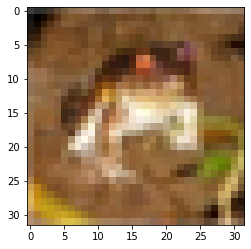

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(img1)
plt.show()

In [ ]:
print(y_train.shape)


(50000, 1)


In [ ]:
print(y_train[:5]) # here we look at the first 5 elements of y_train

[[6]
 [9]
 [9]
 [4]
 [1]]


In [ ]:
print(y_train.min(), y_train.max())

0 9


As we expect, there are as many labels in y_train as images in X_train (50,000). Labels are integers range from 0 to 9 corresponding to the classes they represent. Here's a dictionary of what each integer represents.

In [ ]:
labels = {
	0: 'airplane',
  1: 'automobile',
  2: 'bird',
  3: 'cat',
  4: 'deer',
  5: 'dog',
  6: 'frog',
  7: 'horse',
  8: 'ship',
  9: 'truck'
} # remember img1 has label of 6, that corresponds to a frog

Lastly lets check the size of our test set, I did mention above that CIFAR-10 has 60,000 labelled images and the training set has 50,000 images. So just to be sure

In [ ]:
print(X_train.shape)
print(y_train.shape)


(50000, 32, 32, 3)
(50000, 1)


**Preprocessing**

Preprocessing is an important step in building machine learning algorithms. There are things that you can do on both your X and y. Here we will explore 2 preprocessing techniques, mean-normalization and binary encoding.

**Mean-normalization**

Image pixel values are usually of the datatype uint8 which means an integer between the range of 0 to 255. If we make use of such large numbers in our models, there can be possibility of overflow (what happens when numbers get too big and the machine fails to compute correctly). To reduce possibility of overflow, we scale our original values down to a decimal between 0 and 1. Doing so is easy, we just have to divide every term by 255, the highest possible value.

In [ ]:
dtype_mult = 255.0
X_train = X_train.astype('float32') / dtype_mult

**Binary encoding**

We want to be able to generate a probability index of how likely an image is to belong to each different class. Therefore we make a separate prediction for each class. To do that we also have to do a modification to our y as demonstrated below!

In [ ]:
import keras

num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)

print(y_train.shape)

print(y_train[:5])


(50000, 10)
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


As you can see, we basically transformed y_train into a binary code of is or is not. img1 which is labelled as a frog has an original label value of 6. From the single value of 6 it has transformed into an array of 10 digits, 0s everywhere except for the 6th place which has a value of 1. It just means that it is not a airplane, not a automobile ... but is a frog.

**Model building**

Now is time to define the model. before we declare the model, lets set out a clearly defined structure for our model before actually coding things out. We shall refer to the terminologies as defined in the explanation of CNNs.

**Layer number**
CONV1 3x3

RELU

CONV2 3x3

RELU

POOL1 2x2

CONV3 3x3

RELU

CONV4 3x3

RELU

POOL2 2x2

FC1 256

FC2 10 (as there as 10 classes)


Now that that's out of the way, here is how you define all this in code.

In [ ]:
from tensorflow.keras.layers import Conv2D
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import MaxPooling2D

In [ ]:
model = keras.Sequential() # our defined model functions in some sort of sequence, we use the Sequential class to initialize our model before adding the layers

# Here's how you add layers to your model
# Conv1 32 32 (3) => 30 30 (32)
model.add(Conv2D(32, (3, 3), input_shape=X_train.shape[1:])) # in layer 1 you need to specify input shape this is not needed in subsequent layers
model.add(Activation('relu'))
# Conv2 30 30 (32) => 28 28 (32)
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
# Pool1 28 28 (32) => 14 14 (32)
model.add(MaxPooling2D(pool_size=(2, 2))) # the CONV CONV POOL structure is popularized in during ImageNet 2014
model.add(Dropout(0.25)) # this thing called dropout is used to prevent overfitting

# Conv3 14 14 (32) => 12 12 (64)
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
# Conv4 12 12 (64) => 6 6 (64)
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
# Pool2 6 6 (64) => 3 3 (64)
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# FC layers 3 3 (64) => 576
model.add(Flatten()) # to turn input into a 1 dimensional array
# Dense1 576 => 256
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
# Dense2 256 => 10
model.add(Dense(num_classes))
model.add(Activation('softmax')) # the softmax layer will scale all values down to between 0 and 1 which represents probability index

The dropout layers works like this, choose a percentage of parameters randomly and discard them. Sounds counter intuitive but it works in ensuring that no parameter becomes overbearing on the entire model. Also it is a computationally cheap method to reduce overfitting. Do note that dropout layers do not activate during actual testing.

Then you also have to define your parameter optimization strategy.



In [ ]:
optimizer = keras.optimizers.Adam() # Adam is one of many gradient descent formulas and one of the most popular

There are also other really good optimizers like RMSprop but for most cases Adam works well enough on it's own. You can attempt to change the learning rate and decay rate. But make sure you know how to conduct gradient descent before actually doing so!


Finally compile the model, simple as that.


In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

**Model training**
Using the dataset we can calculate the set of suitable parameters, the process of finding those parameters is called training. Training of model cannot be simpler.

In [ ]:
nb_epoch = 200 # number of iterations to train on
batch_size = 128 # process entire image set by chunks of 128

model.fit(X_train, y_train, batch_size=128, epochs= 200) # be wawrned that the entire model can take over 4 hours to train if you are not using GPU

Epoch 1/200
391/391 [==============================] - 3s 7ms/step - loss: 0.6171 - accuracy: 0.7799
Epoch 2/200
391/391 [==============================] - 3s 7ms/step - loss: 0.6033 - accuracy: 0.7853
Epoch 3/200
391/391 [==============================] - 3s 7ms/step - loss: 0.5911 - accuracy: 0.7923
Epoch 4/200
391/391 [==============================] - 3s 7ms/step - loss: 0.5781 - accuracy: 0.7948
Epoch 5/200
391/391 [==============================] - 3s 7ms/step - loss: 0.5701 - accuracy: 0.7971
Epoch 6/200
391/391 [==============================] - 3s 7ms/step - loss: 0.5545 - accuracy: 0.8052
Epoch 7/200
391/391 [==============================] - 3s 7ms/step - loss: 0.5482 - accuracy: 0.8045
Epoch 8/200
391/391 [==============================] - 3s 7ms/step - loss: 0.5342 - accuracy: 0.8110
Epoch 9/200
391/391 [==============================] - 3s 7ms/step - loss: 0.5264 - accuracy: 0.8135
Epoch 10/200
391/391 [==============================] - 3s 7ms/step - loss: 0.5249 - accura